In [2]:
%%capture

!pip install openpyxl
!pip install seaborn

import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

warnings.simplefilter("ignore")

In [3]:
#YEARLY DATA
kw_2014 = pd.read_csv("Sustainability_Interest_Over_Time/Yearly_KW_Data/KW_2014.csv")
kw_2015 = pd.read_csv("Sustainability_Interest_Over_Time/Yearly_KW_Data/KW_2015.csv")
kw_2016 = pd.read_csv("Sustainability_Interest_Over_Time/Yearly_KW_Data/KW_2016.csv")
kw_2017 = pd.read_csv("Sustainability_Interest_Over_Time/Yearly_KW_Data/KW_2017.csv")
kw_2018 = pd.read_csv("Sustainability_Interest_Over_Time/Yearly_KW_Data/KW_2018.csv")
kw_2019 = pd.read_csv("Sustainability_Interest_Over_Time/Yearly_KW_Data/KW_2019.csv")
kw_2020 = pd.read_csv("Sustainability_Interest_Over_Time/Yearly_KW_Data/KW_2020.csv")
kw_2021 = pd.read_csv("Sustainability_Interest_Over_Time/Yearly_KW_Data/KW_2021.csv")
kw_2022 = pd.read_csv("Sustainability_Interest_Over_Time/Yearly_KW_Data/KW_2022.csv")
kw_2023 = pd.read_csv("Sustainability_Interest_Over_Time/Yearly_KW_Data/KW_2023.csv")

def total(df,year):
    df.drop('Avg. Interactions',axis=1,inplace=True)
    
    if df['Total Interactions'].dtype == 'O':
        df['Total Interactions'] = df['Total Interactions'].str.replace(',','')
        
    if df['Article Count'].dtype == 'O':
        df['Article Count'] = df['Article Count'].str.replace(',','')
        
    df[['Article Count','Total Interactions']] = df[['Article Count','Total Interactions']].astype('int64')
    final = pd.DataFrame({'Year':[year],'Article Count':[df['Article Count'].sum()],'Interactions':[df['Total Interactions'].sum()]})
    return final
    
year_kw = pd.concat([total(kw_2014,2014),total(kw_2015,2015),total(kw_2016,2016),total(kw_2017,2017),total(kw_2018,2018),
                    total(kw_2019,2019),total(kw_2020,2020),total(kw_2021,2021),total(kw_2022,2022),total(kw_2023,2023)],axis=0,ignore_index=True)

year_kw.to_csv("Sustainability_Interest_Over_Time/Yearly_KW_Data/Yearly_Keyword_Data.csv")

,Year,Article Count,Interactions
0,2014,55,5825
1,2015,2479,117683
2,2016,3015,768465
3,2017,3412,647763
4,2018,4606,275170
5,2019,14048,1662248
6,2020,10907,968800
7,2021,22594,910650
8,2022,19934,362830
9,2023,36936,209181


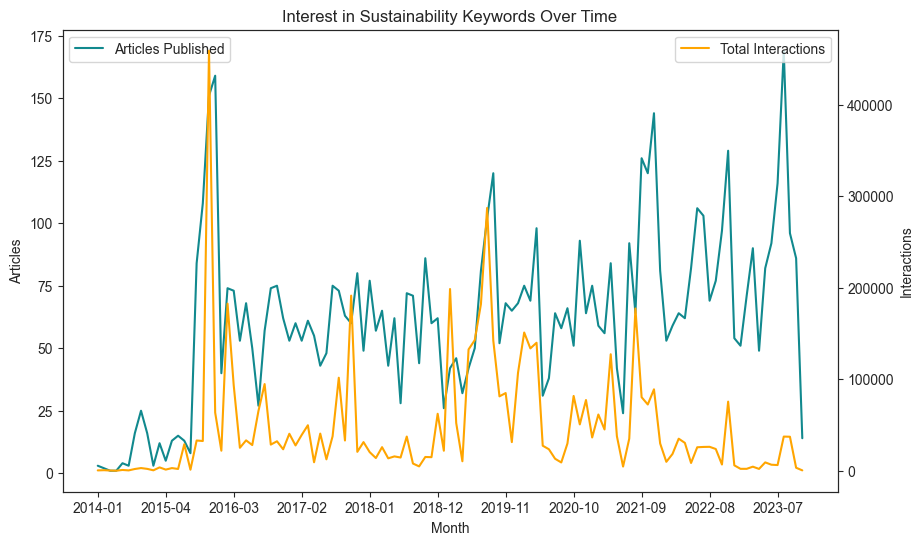

In [4]:
#Check share of article volume coverage
#Do same line graph without interactions but break down article keyword -> Include CSR


#MONTHLY DATA
mon_2014 = pd.read_excel("Sustainability_Interest_Over_Time/Monthly_KW_Data/2014.xlsx",header=0)
mon_2015 = pd.read_excel("Sustainability_Interest_Over_Time/Monthly_KW_Data/2015.xlsx",header=0)
mon_2016 = pd.read_excel("Sustainability_Interest_Over_Time/Monthly_KW_Data/2016.xlsx",header=0)
mon_2017 = pd.read_excel("Sustainability_Interest_Over_Time/Monthly_KW_Data/2017.xlsx",header=0)
mon_2018 = pd.read_excel("Sustainability_Interest_Over_Time/Monthly_KW_Data/2018.xlsx",header=0)
mon_2019 = pd.read_excel("Sustainability_Interest_Over_Time/Monthly_KW_Data/2019.xlsx",header=0)
mon_2020 = pd.read_excel("Sustainability_Interest_Over_Time/Monthly_KW_Data/2020.xlsx",header=0)
mon_2021 = pd.read_excel("Sustainability_Interest_Over_Time/Monthly_KW_Data/2021.xlsx",header=0)
mon_2022 = pd.read_excel("Sustainability_Interest_Over_Time/Monthly_KW_Data/2022.xlsx",header=0)
mon_2023 = pd.read_excel("Sustainability_Interest_Over_Time/Monthly_KW_Data/2023.xlsx",header=0)

def wrangle(df):
    df.drop(['Link','Authors','Pinterest','LinkedIn','Twitter Influencer Shares','Total Facebook','Likes','Shares','Comments'],axis=1,inplace=True)
    df['Published'] = pd.to_datetime(df['Published'],format='%Y-%m-%dT%H:%M:%S%z')
    df['Headline'] = df['Headline'].str.lower()
    df = df.rename(columns={'Published':'Date','Group':'Keyword','Headline':'Title','Total Interactions':'Interactions'})
    df = df.reindex(columns=['Date','Month','Keyword','Title','Website','Interactions'])
    df['Month'] = df['Date'].dt.to_period('M')
    return df

mon_kw = pd.concat([wrangle(mon_2014),wrangle(mon_2015),wrangle(mon_2016),wrangle(mon_2017),wrangle(mon_2018),
                   wrangle(mon_2019),wrangle(mon_2020),wrangle(mon_2021),wrangle(mon_2022),wrangle(mon_2023)],axis=0,ignore_index=True)

mon_kw.to_csv("Sustainability_Interest_Over_Time/Monthly_KW_Data/Monthly_Keyword_Data.csv")

forviz = mon_kw[['Month','Keyword','Interactions']].groupby(['Month']).agg({'Keyword':'count','Interactions':'sum'}).rename(columns={'Keyword':'Articles'})
forviz.reset_index(inplace=True)
forviz['Month'] = forviz['Month'].astype('str')


plt.figure(figsize=(10,6))
sns.set_style('ticks')
sns.lineplot(data=forviz,x='Month',y='Articles',label='Articles Published',color='#11898E')

ax2 = plt.twinx()
sns.lineplot(data=forviz,x='Month',y='Interactions',label='Total Interactions',color='orange')

ax1 = plt.gca()

ax2.set_xticks(forviz['Month'].tolist()[0::11])

ax1.set_ylabel("# of Articles")
ax2.set_ylabel("Interactions")
plt.title('Interest in Sustainability Keywords Over Time')

plt.show()